# Predicting Zillow´s rental price index using PCA

## 1. Import libraries and dataframe.

### 1.1 Import libraries

In [109]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import os
import matplotlib 
from matplotlib import pyplot as plt
import math

### 1.2 Import dataframe

In [110]:
# Import dataframe
os.chdir('C:/Users/Guillermo/Desktop/ESTUDIOS/Data Science Bootcamp/Projects/4. Capstone/Data')
df = pd.read_csv('df.csv')

## 2. Data Preprocessing

### 2.1 Split dataframe

#### Split the dataframe between a training and a testing dataframes in order to be able to evaluate our predictions.

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,df.columns != '2017-12'], df['2017-12'], test_size=0.2, random_state = 5)

### 2.2 Missing values

#### In a first exploration we check the number of rows with missing values and the total number of missing values in the training set. This reveals a high number of missing values spread over several variables. Especially, few variables have a high number of missing values. 

#### In order to have a visual representation a plot with the proportion of missing values per variable in the training set is created below.

The number of missing values in the training set is 36419.
The number of rows with missing values in the training set is 3532.


Text(0, 0.5, 'Variables')

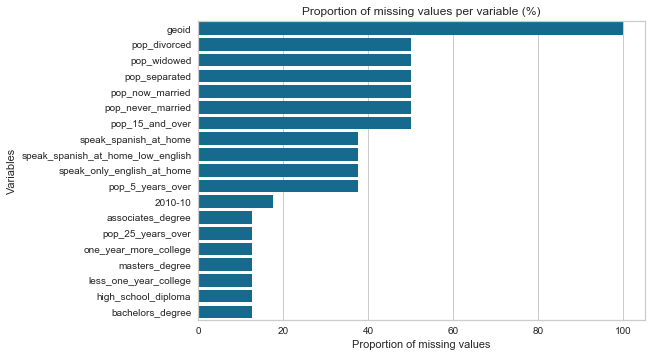

In [112]:
# Total number of missing values in the training set
print('The number of missing values in the training set is {}.'.format(x_train.isna().sum().sum()))

# Total number of rows with missing values. 
print('The number of rows with missing values in the training set is {}.'.format(x_train.shape[0] - x_train.dropna().shape[0]))

# Overview of missing values per variable
df1 = pd.DataFrame(round(((x_train.isna().sum())/x_train.shape[0])*100,2)).reset_index()
df1.rename(columns = {'index':'variables', 0:'missing_values'}, inplace = True)
df1 = df1[df1['missing_values'] > 12].sort_values(ascending = False, by = 'missing_values')
sns.barplot(x = 'missing_values', y = 'variables', data = df1, color = 'b')
plt.title('Proportion of missing values per variable (%)', loc = 'center')
plt.xlabel('Proportion of missing values')
plt.ylabel('Variables')


#### Now, we check the number of rows with missing values and the total number of missing values in the testing set. Again, this reveals a high number of missing values spread over several variables. In addition, we can see that one variable, Electrical, has only one missing value and that it fell in the testing set when the split was done. Therefore, there is an additional feature we have to impute in the testing set in comparison to the training set. 

#### Again, in order to have a visually representation a plot with the proportion of missing values per variable in the testing set is created.

The number of missing values in the testing set is 9373.
The number of rows with missing values in the testing set is 884.


Text(0, 0.5, 'Variables')

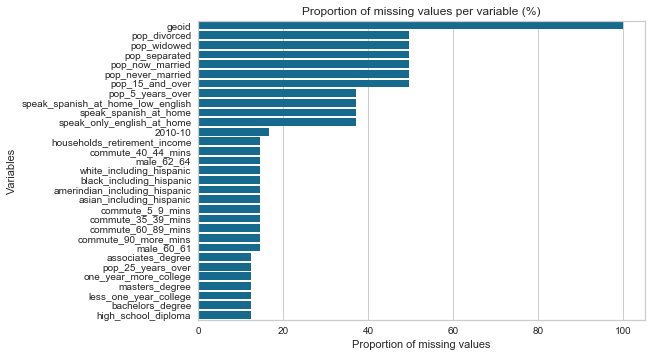

In [113]:
# Total number of missing values in the testing set
print('The number of missing values in the testing set is {}.'.format(x_test.isna().sum().sum()))

# Total number of rows with missing values. 
print('The number of rows with missing values in the testing set is {}.'.format(x_test.shape[0] - x_test.dropna().shape[0]))

# Overview of missing values per variable
df1 = pd.DataFrame(round(((x_test.isna().sum())/x_test.shape[0])*100,2)).reset_index()
df1.rename(columns = {'index':'variables', 0:'missing_values'}, inplace = True)
df1 = df1[df1['missing_values'] > 12].sort_values(ascending = False, by = 'missing_values')
sns.barplot(x = 'missing_values', y = 'variables', data = df1, color = 'b')
plt.title('Proportion of missing values per variable (%)', loc = 'center')
plt.xlabel('Proportion of missing values')
plt.ylabel('Variables')

#### All of our variables are numeric. We imput using the median. We do so trying to keep the imputation as local as possible. We start imputing the median of the city and move to the State for the values that remain missing.
#### We impute in the testing set using the training set as a reference.

In [114]:
missing_values_featues = x_train.isna().sum().reset_index().rename(columns = {0:'missing_values'})
for feature in list(missing_values_featues[missing_values_featues['missing_values'] > 0].iloc[:,0]):
    # We start at the city level
    x_train[feature] = x_train.groupby('City')[feature].transform(lambda x: x.fillna(x.median()))
    for i in range(0, x_test.shape[0]):
        if x_test['City'].iloc[i] in list(x_train['City'].unique()):
            x_test[feature].iloc[i] = x_train.groupby('City')[feature].median()[x_test['City'].iloc[i]]
        else:
            x_test[feature].iloc[i] = x_train[feature].median()
    # Next we move to the state level
    x_train[feature] = x_train.groupby('State')[feature].transform(lambda x: x.fillna(x.median()))
    for i in range(0, x_test.shape[0]):
        if x_test['State'].iloc[i] in list(x_train['State'].unique()):
            x_test[feature].iloc[i] = x_train.groupby('State')[feature].median()[x_test['State'].iloc[i]]
        else:
            x_test[feature].iloc[i] = x_train[feature].median()

C:\Users\Guillermo\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### geoid does not contain relevant information as we can use geo_id instead. Therefore, we drop it.

In [115]:
x_train.drop(columns = ['geoid'], inplace = True)
x_test.drop(columns = ['geoid'], inplace = True)

#### City and State provides no information as all our locations are in Phoenix.

In [116]:
x_train.drop(columns = ['State'], inplace = True)
x_test.drop(columns = ['State'], inplace = True)

In [117]:
# Total number of missing values in the training set
print('The number of missing values in the training set is {}.'.format(x_train.isna().sum().sum()))
# Total number of rows with missing values. 
print('The number of rows with missing values in the training set is {}.'.format(x_train.shape[0] - x_train.dropna().shape[0]))

print(' ')

# Total number of missing values in the testing set
print('The number of missing values in the testing set is {}.'.format(x_test.isna().sum().sum()))
# Total number of rows with missing values. 
print('The number of rows with missing values in the testing set is {}.'.format(x_test.shape[0] - x_test.dropna().shape[0]))


The number of missing values in the training set is 0.
The number of rows with missing values in the training set is 0.
 
The number of missing values in the testing set is 0.
The number of rows with missing values in the testing set is 0.


### 2.3 Feature engineering

#### Location variables: since all our zipcodes are in Phoenix, variables providing information about the city, state, metro or county don´t provide any extra information. Therefore, we drop them.

In [118]:
x_train.drop(columns = ['Metro', 'CountyName', 'City'], inplace = True)
x_test.drop(columns = ['Metro', 'CountyName', 'City'], inplace = True)

#### do_date doesn´t provide any information about the dependent variable. Therefore, we drop it.

In [119]:
x_train.drop(columns = ['do_date'], inplace = True)
x_test.drop(columns = ['do_date'], inplace = True)

#### Unnamed is an index variable that it´s not necessary. Therefore, we drop it.

In [120]:
x_train.drop(columns = ['Unnamed: 0'], inplace = True)
x_test.drop(columns = ['Unnamed: 0'], inplace = True)

#### RegionID repeats the information contain in geo_id. Therefore, we drop it.

In [121]:
x_train.drop(columns = ['RegionID'], inplace = True)
x_test.drop(columns = ['RegionID'], inplace = True)

#### SizeRank is just an ordering of size. We drop it.

In [122]:
x_train.drop(columns = ['SizeRank'], inplace = True)
x_test.drop(columns = ['SizeRank'], inplace = True)

#### RegionName is not a variable that we are going to use to predict.

In [123]:
x_train.drop(columns = ['RegionName'], inplace = True)
x_test.drop(columns = ['RegionName'], inplace = True)

#### Unnamed is an index variable that provides no information.

In [124]:
x_train.drop(columns = ['Unnamed: 0.1'], inplace = True)
x_test.drop(columns = ['Unnamed: 0.1'], inplace = True)

#### year is not a variable that we are using to predict. Therefore, we drop it.

In [125]:
x_train.drop(columns = ['year'], inplace = True)
x_test.drop(columns = ['year'], inplace = True)

### 2.4 Outlier detection

#### In order to detect outliers Cook´s distance is implemented. The observations that are signal out are appended to a list. We also try to identify outliers by checking whether they fall out of the inter quantile range (IQR). These outliers are also appended to a different list. Afterwards, we decide to drop the outliers that appear in both lists. The reason we follow this approach is that the Cook´s distance assumes an ordinary least square regression in order to identify outliers. Given that we also plan to implement different linear models (lasso and ridge in particular), it was decided to also use the IQR.

#### IQR outlier detection.

In [126]:
train = pd.concat([y_train, x_train], axis = 1)

# Define a function that will detect outliers according to the following boundaries:
def outlier_detection(feature): 
    sorted(feature) 
    q1,q3 = np.percentile(feature , [25,75]) 
    IQR = q3 - q1 
    lower_range = q1 - (3 * IQR) 
    upper_range = q3 + (3 * IQR) 
    return lower_range,upper_range

# Apply the function above to all numerical variables in the dataframe. Outliers found for every variable will be stored
# in a list and then append it to a nested list that contains all of the outlier´s indexes (so one list per variable within
# the nested list).
num_features = train.select_dtypes(include = ['number']).columns
outliers = {}
list_outliers = []
for feature in num_features:
    outlier_detection(train[feature])
    lower_range, upper_range = outlier_detection(train[feature])
    overall_qual_drop = train[(train[feature] < lower_range) | (train[feature] > upper_range)]
    outliers[feature] = list(overall_qual_drop.index)
    list_outliers.append(list(overall_qual_drop.index))

# Flatten the nested list so that we have a list with all the outliers´ indexes detected for each variable.
flat_list = []
for sublist in list_outliers:
    for item in sublist:
        flat_list.append(item)

# Create a dictinary with the counts of every outlier, so that we know how many times a single observation has been 
# classified as an outlier. We then sort the dictionary by descending order.
repeated_outliers = {i: flat_list.count(i) for i in flat_list}
repeated_outliers = sorted(repeated_outliers.items(), key = lambda x: x[1], reverse = True)

# We plot the output:
print('Number of times an observation is classified as an outlier:')
print('  ')
print('Nº       Index')
for index, outliers in repeated_outliers:
    print('{}        {}'.format(outliers, index))

Number of times an observation is classified as an outlier:
  
Nº       Index
50        4274
50        4273
50        4267
50        4299
50        4298
50        4250
50        4290
50        4264
50        4288
50        4234
50        4241
50        4313
50        4280
50        4259
50        4235
50        4256
50        4314
50        4275
50        4226
50        4227
50        4282
50        4251
50        4243
50        4232
50        4257
50        4258
50        4242
50        4248
50        4296
50        4233
50        4281
50        4312
50        4297
50        4283
50        4224
50        4240
50        4305
50        4315
50        4291
50        4265
44        4260
44        4238
44        4252
44        4317
44        4303
44        4287
44        4276
44        4246
44        4245
44        4237
44        4316
44        4319
44        4236
44        4255
44        4286
44        4318
44        4231
44        4228
44        4285
44        4284
44        4277
44     

In [127]:
outlier_index = []
for i in range(0,40):
    outlier_index.append(repeated_outliers[i][0])
print('The outliers to be removed from the dataframe are {}'.format(outlier_index))

The outliers to be removed from the dataframe are [4274, 4273, 4267, 4299, 4298, 4250, 4290, 4264, 4288, 4234, 4241, 4313, 4280, 4259, 4235, 4256, 4314, 4275, 4226, 4227, 4282, 4251, 4243, 4232, 4257, 4258, 4242, 4248, 4296, 4233, 4281, 4312, 4297, 4283, 4224, 4240, 4305, 4315, 4291, 4265]


#### Cook´s distance outlier detection.

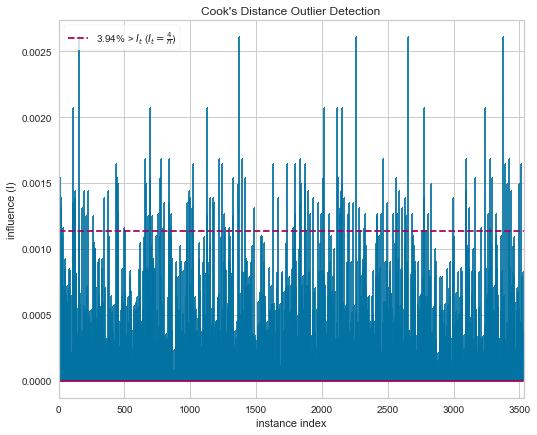

In [128]:
from yellowbrick.base import Visualizer
from yellowbrick.regressor import CooksDistance
visualizer = CooksDistance(size = (600, 500))
z = x_train.select_dtypes(include = ['int64', 'float64'])
visualizer.fit(z, y_train)
visualizer.poof()

In [129]:
outliers = visualizer.distance_ >= visualizer.influence_threshold_
outliers = list(outliers[outliers == True].index)

outlier = []
for i in range(1,len(outliers)):
    if outliers[i] in outlier_index:
               outlier.append(outliers[i])

In [130]:
x_train.drop(index = outlier, inplace = True)
y_train.drop(index = outlier, inplace = True) 

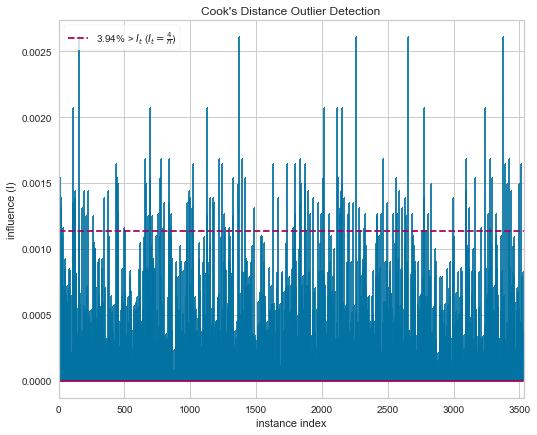

In [131]:
visualizer = CooksDistance(size = (600, 500))
z = x_train.select_dtypes(include = ['int64', 'float64'])
visualizer.fit(z, y_train)
visualizer.poof()

### 2.5 Yeo-Johnson transformation

#### Before implementing any transformation, we plot the distribution of our numerical variables:

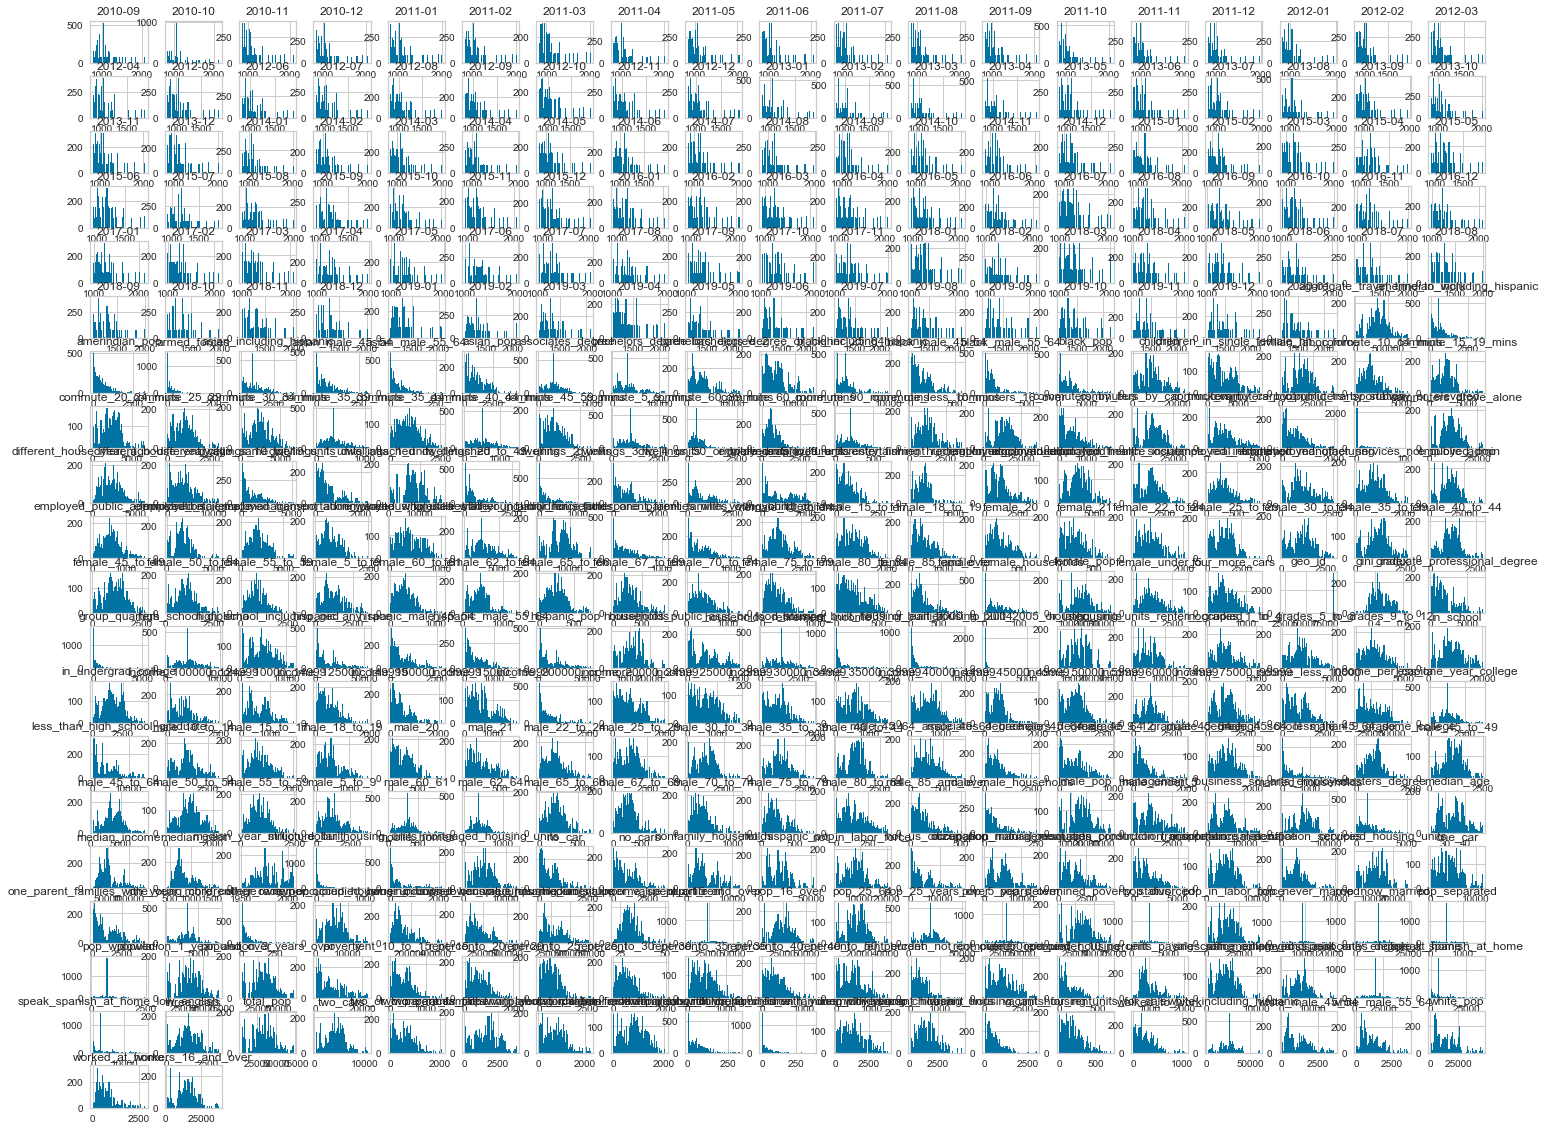

In [132]:
x_train.select_dtypes(include = ['int64', 'float64']).hist(bins = 50, figsize = (25,20))
plt.show()

#### We can see how the continuous numerical variables are right skewed. In order to correct for this, we try a yeo-johnson transformation to normalize our features. There are three reasons why the yeo-johnson transformation is chosen: 
#### 1. Many of our features we have zero values and the box-cox transformation demands strictly positives values.
#### 2. Yeo-johnson tranformation allows to train in the training data and then apply to the testing data. Therefore, it keeps the rigour we need to keep to then realistically evaluate our model. 
#### 3. Yeo-johnson transformation also scales the data and centers it around zero.

In [133]:
from sklearn.preprocessing import PowerTransformer
    
pt = PowerTransformer(method = 'yeo-johnson')
for feature in list(x_train.select_dtypes(include = ['int64', 'float64'])):
    x_train[feature] = pt.fit_transform(x_train[feature].to_numpy().reshape(-1,1))
    x_test[feature] = pt.transform(x_test[feature].to_numpy().reshape(-1,1))   

C:\Users\Guillermo\Anaconda3\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


#### We now check how the yeo-johnson transformation scaled and normalized our data. 

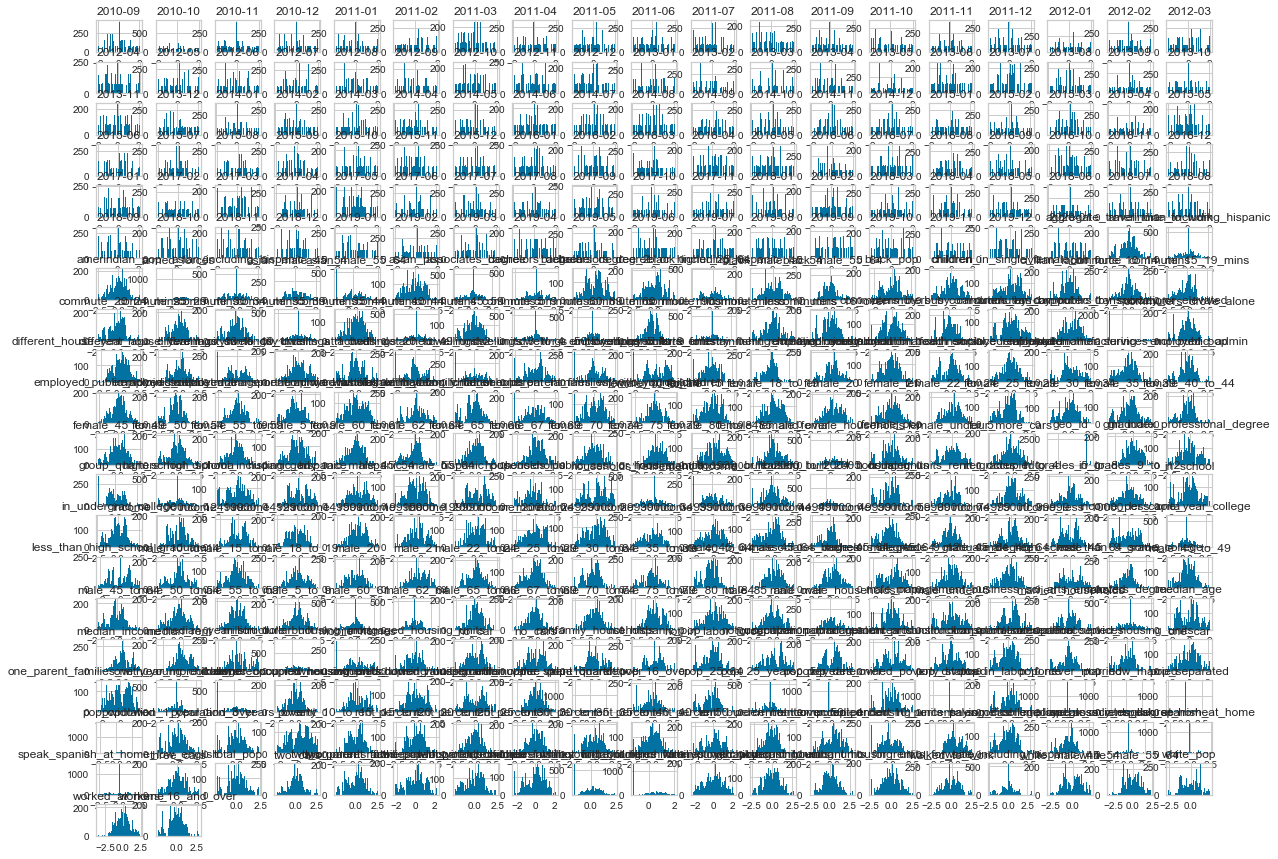

In [134]:
x_train.select_dtypes(include = ['int64', 'float64']).hist(bins = 50, figsize = (20,15))
plt.show()

### 2.6 Target variable´s logarithmic transformation 

#### The distribution of the dependent variables is right skewed. This will be a problem when implementing linear models. 

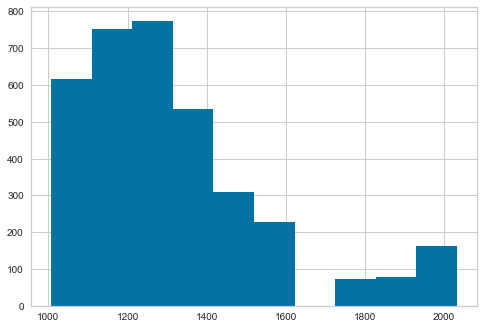

In [135]:
# Distribution of the dependent variable (y_train).
y_train.hist()
# HOW TO ELIMINATE THE SQUARES?

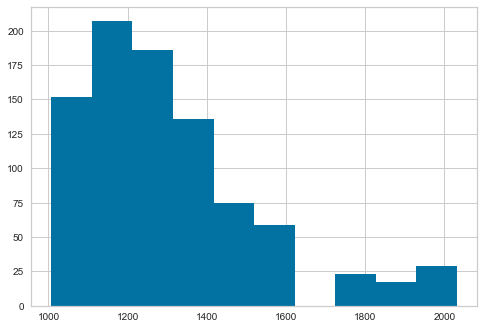

In [136]:
# Distribution of the dependent variable (y_train).
y_test.hist()

#### Because of this reason, we perform a logarithmic transformation on the dependent variable. We then check that it is now normally distributed in both the training and testing datasets.

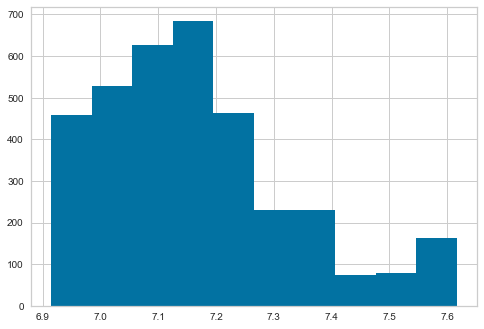

In [137]:
# We apply the logarithmic transformation.
y_train = y_train.apply(lambda x: np.log(x))

# We check the new dependent variable´s distribution.
y_train.hist() 
# IS IT BETTER FOR NON-LINEAR MODELS NOT TO HAVE THE LOG? 
# LOG SHOULD BE DONE BEFORE OR AFTER SCALING?
# ELIMINATE SQUARES.


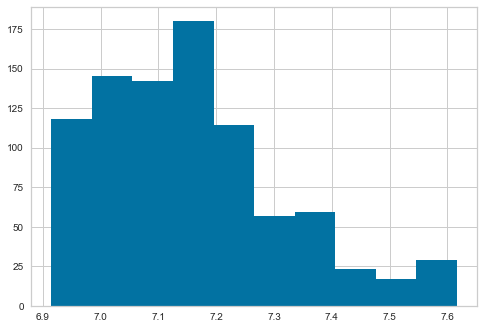

In [138]:
# We apply the logarithmic transformation.
y_test = y_test.apply(lambda x: np.log(x))

# We check the new dependent variable´s distribution.
y_test.hist() 

### 2.8 Scale data

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = True, with_mean = True, with_std = True) 
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

### 2.9 Principal component analysis

#### First, let´s have a look at the correlation matrix. The information in this variables will be concentrated in the uncorrelated principal components.

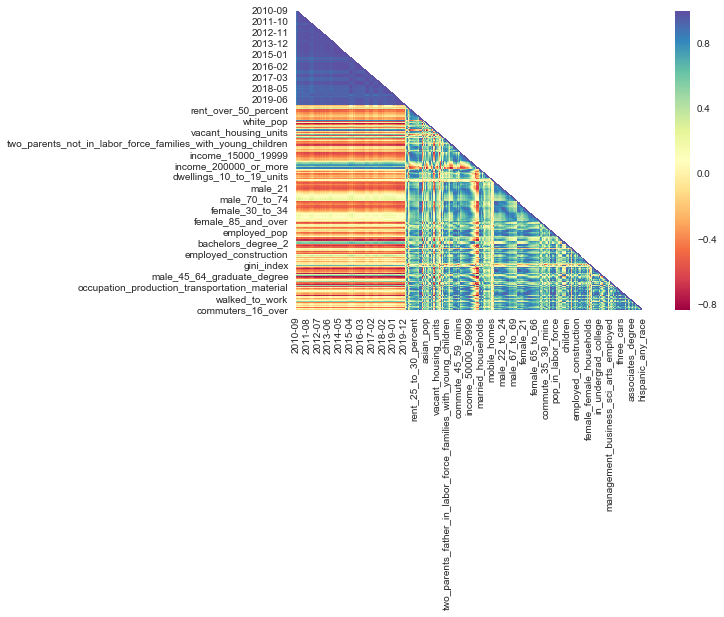

In [140]:
num_features = x_train.select_dtypes(include = ['int64', 'float64'])
corr_x_train =  num_features.corr(method = 'pearson') 
matrix = corr_x_train.where(np.tril(np.ones(corr_x_train.shape)).astype(np.bool))

hmap = sns.heatmap(matrix, cmap = "Spectral")
hmap

In [141]:
def PCA_dist(df, figure_size = (8,5), df_name ='features'):
    pca = PCA(n_components = df.shape[1]) 
    components = pca.fit_transform(df)
    lis = df.columns.to_list() # indices of original col names
    matrix = pd.DataFrame(np.dot(df.T,components),columns = ['PC'+ str(i) for i in range(1,len(lis) + 1)],
                         index = lis)
    
    normalized = (matrix.copy() - matrix.mean())/matrix.std() 
    absolute = normalized.copy().abs() 
    
    plt.figure(figsize = figure_size)
    heatmap = sns.heatmap(absolute, cmap = "Purples")
    title = "Features in PCs".format(df_name)
    heatmap.set_title(title)
    plt.show()

#### Commuting

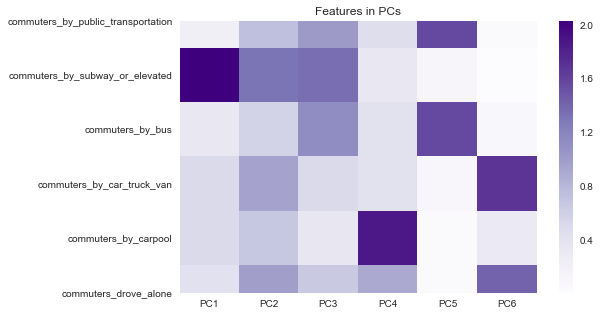

In [142]:
commuting = x_train[['commuters_by_public_transportation','commuters_by_subway_or_elevated','commuters_by_bus',
                     'commuters_by_car_truck_van','commuters_by_carpool', 'commuters_drove_alone']]
PCA_dist(commuting, df_name='Features')

#### Education

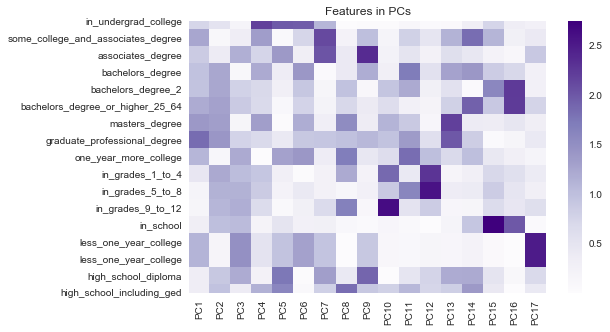

In [143]:
education = x_train[['in_undergrad_college','some_college_and_associates_degree','associates_degree',
                     'bachelors_degree','bachelors_degree_2', 'bachelors_degree_or_higher_25_64',
                    'masters_degree', 'graduate_professional_degree', 'one_year_more_college', 'in_grades_1_to_4',
                    'in_grades_5_to_8', 'in_grades_9_to_12', 'in_school', 'less_one_year_college', 'less_one_year_college',
                    'high_school_diploma', 'high_school_including_ged']]
PCA_dist(education, df_name='Features')

#### We plot a screeplot to determine the optimal amount of principal components. 

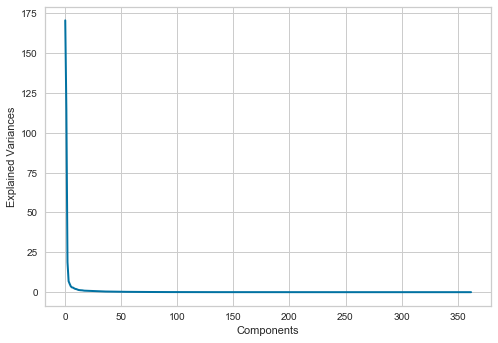

In [144]:
# Find the optimal amount of principal components
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(x_train)


#plt.plot(pca.explained_variance_ratio_, linewidth = 2)
plt.plot(pca.explained_variance_, linewidth = 2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()

#### It´s difficult to visualize the exact amount of principal components in the plot above. Therefore, we fit a PCA with ten principal components and check how much variance in the data they captured.

In [145]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(x_train)

print('The amount of variance explained by each principal component is:') 
print('{}'.format(pca.explained_variance_ratio_))

The amount of variance explained by each principal component is:
[0.46967414 0.31444034 0.05197154 0.0189476  0.01413876 0.00991532
 0.00823946 0.00779981 0.00650375 0.00559698]


#### From the numbers above, we decide to keep 3 principal components, as after the thirth one the amount of variance explained is very small. 

In [146]:
# Fit PCA with right amount of principal components
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)

x_train = pd.DataFrame(pca.fit_transform(x_train), columns = ['p_component1', 'p_component2', 'p_component3'])
x_test = pd.DataFrame(pca.transform(x_test), columns = ['p_component1', 'p_component2', 'p_component3'])


#### Once we have the principal components, we check how they are uncorrelated.

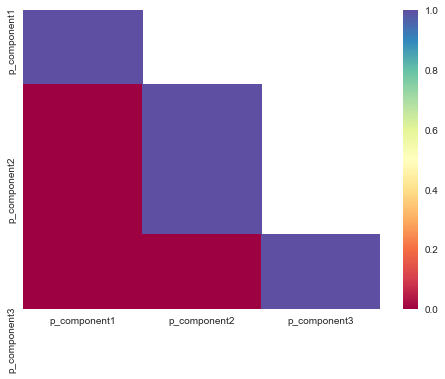

In [147]:
num_features = x_train.select_dtypes(include = ['int64', 'float64'])
corr_x_train =  num_features.corr(method = 'pearson') 
matrix = corr_x_train.where(np.tril(np.ones(corr_x_train.shape)).astype(np.bool))

hmap = sns.heatmap(matrix, cmap = "Spectral")
hmap

## 4. Lasso Regression

#### As explained before, our multiple linear regression model suffers from multicollinearity. In order to solve this problem we move on to try regression models with regularization properties. In the first place, we try the lasso regression. The steps to follow are:
#### 1. We implement the lasso regression model and check the R-squared for the training and testing dataframes and the degree of regularization in the model. 
#### 2. We tune the hyperparameters using cross-validation and use them to fit a new model, thus trying to find the right balance between accuracy and variance of the model, avoiding over-fitting.
#### 3. Test linear models assumptions.
#### 4. Generate a prediction using our model and comparing it to the testing dataset (y_test) to evaluate its accuracy.  

### 4.1 Implement the lasso regression model

In [148]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)

# Check the model´s performance.
print('Training set R-squared is {}'.format(lasso.score(x_train, y_train)))
print('Testing set R-squared is {}'.format(lasso.score(x_test, y_test)))
print('Amount of penalization is {}'.format(lasso.alpha))
# WOULD YOU PUT THIS TOGETHER OR PUT THE CHECK PERFORMANCE IN A DIFFERENT CELL? HOW TO BEST STRUCTURE THE CHUNKS? 
# Separate and leave markdown comment.

Training set R-squared is 0.41997582236099174
Testing set R-squared is 0.2892251221580193
Amount of penalization is 1.0


### 4.2 Tune the hyperparameters using cross-validation and fit a new model

In [149]:
from sklearn.linear_model import LassoCV
cv_lasso = LassoCV(n_alphas = 200, cv = 3, max_iter = 2600, fit_intercept = True) 
cv_lasso.fit(x_train, y_train)

# HOW AM I GETTING WORSE PERFORMANCE WITH CROSS-VALIDATION?

# Check Lasso´s performance and best parameters as outcomes of cross validation.
print('Training set R-squared is {}'.format(cv_lasso.score(x_train, y_train)))
print('Testing set R-squared is {}'.format(cv_lasso.score(x_test, y_test)))
print('Amount of penalization is {}'.format(cv_lasso.alpha_))

Training set R-squared is 0.9116813172937848
Testing set R-squared is 0.7109560699180267
Amount of penalization is 0.0017481063261944845


### 4.3 Test linear model assumptions

#### 1. Homoskedasticity assumption. 

#### We run a bartlett test by splitting the residual´s array into two different arrays to test if they have the same variance (bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances).

#### We also plot the residuals plot to have a visual representation of the residuals distribution and check whether there is heteroskedasticity. 

The bartlett test´s statistics is 8.935147926351302 and the p-value is 0.002797348132250506


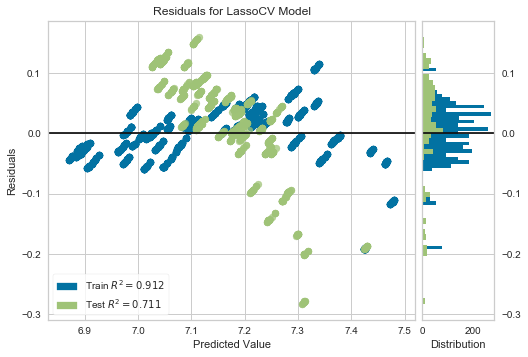

In [150]:
# Bartlett’s test
residuals = cv_lasso.predict(x_test) - y_test

split_array = np.split(residuals, 2)
sample1 = split_array[0]
sample2 = split_array[1]

from scipy import stats
import scipy.stats
bartlett = stats.bartlett(sample1, sample2)
print('The bartlett test´s statistics is {} and the p-value is {}'.format(bartlett[0], bartlett[1]))

# Plot residuals
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(cv_lasso)

# Fit the training data to the visualizer
visualizer.fit(x_train, y_train)  
# Evaluate the model on the test data
visualizer.score(x_test, y_test)  
# Finalize and render the figure
visualizer.show()

#### The plot allows us to check that there is not heteroskedasticity. In addition, the bartlett’s test p_value does not suffice to reject the null hypothesis (equal variances). Therefore, we can conclude that the homoskedasticity assumption holds. 

#### 2. Normality of the residuals assumption



#### In order to check normality a Q-Q plot is visualized below. Also, a battery of normality test are run: Jarque-Bera test, Shapiro-Wilk test, Anderson-Darling test and the Kolmogorov-Smirnov test.

Jarque_bera statistic is 244.55429365997864 and the p-value is 0.0
Shapiro-Wilk statistic is 0.9024369716644287 and the p-value is 2.7116112274006186e-23
Anderson-Darling statistic is 28.365839076217753 and the p-values are [0.573 0.653 0.783 0.914 1.087]
Kolmogorov-Smirnov statistic is 0.4369204289782821 and the p-value is 4.762427691527776e-154


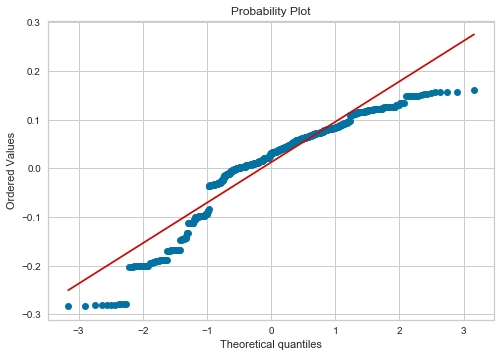

In [151]:
from scipy import stats
# Jarque_bera test
jb = stats.jarque_bera(residuals)
print('Jarque_bera statistic is {} and the p-value is {}'.format(jb[0], jb[1]))
# Shapiro-Wilk test
sw = stats.shapiro(residuals)
print('Shapiro-Wilk statistic is {} and the p-value is {}'.format(sw[0], sw[1]))
# Anderson-Darling test
ad = stats.anderson(residuals, dist = 'norm')
print('Anderson-Darling statistic is {} and the p-values are {}'.format(ad[0], ad[1]))
# Kolmogorov-Smirnov test
ks = stats.kstest(residuals, 'norm')
print('Kolmogorov-Smirnov statistic is {} and the p-value is {}'.format(ks[0], ks[1]))

# Plot Q-Q graph
import pylab 
import scipy.stats as stats
stats.probplot(residuals, dist = "norm", plot = pylab)
pylab.show()

#### The plot shows that the residuals don´t follow an exact normal distribution. The battery of tests confirm this result. The fact that the normality assumptions does not hold should make us skeptical of the reliability of the model. Because of this reason, we will compare the predictions of the model against the y_test prices we are trying to predict. 

#### 3. Independence of the residuals assumption





#### Same as with the multiple linear regression model, a Durbin-Watson test is implemented to evaluate whether the residuals are indepentent.

In [152]:
from statsmodels.stats.stattools import durbin_watson

db = durbin_watson(residuals, axis = 0)

print('The Durbin_Watson statistics is {}'.format(db))

The Durbin_Watson statistics is 1.9763597622611477


#### From the result above we can conclude that our residuals are independent. 

### 4.4 Generate and evaluate the prediction

#### Once we have our model, we predict prices for the houses in the testing dataset. This results in a vector that can be compared with the actual testing dataset (y_test). We test the accuracy of the predictions calculating the mean absolute error.

In [153]:
# Predict SalePrices with the model.
prediction = cv_lasso.predict(x_test)

# Check accuracy with MSE
from sklearn.metrics import mean_squared_error
print('The mean squared error (MSE) is {}'.format(mean_squared_error(y_test, prediction)))

# Check accuracy with RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print('The root mean squared error (RMSE) is {}'.format(sqrt(mean_squared_error(y_test, prediction))))

# Check the accuracy of the model with the test dataset.
from sklearn.metrics import mean_absolute_error
print('The mean absolute error (MAE) is {}'.format(mean_absolute_error(y_test, prediction)))

The mean squared error (MSE) is 0.007753614313054139
The root mean squared error (RMSE) is 0.08805460983420538
The mean absolute error (MAE) is 0.06778563290386308


## 5. Ridge Regression

#### Ridge regression is another linear model that allows regularization. We follow the same steps as before when implementing lasso: 
#### 1. Implement the ridge regression model, check the R-squared for the training and testing dataframes and the degree of regularization in the model. 
#### 2. Tune the hyperparameters using cross-validation and use them to fit a new model.
#### 3. Evaluate wether the linear regression assumptions hold.
#### 4. Generate a prediction using our model and comparing it to the testing dataset (y_test) to evaluate its accuracy.  

### 5.1 Implement the ridge model

In [154]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)

# Check the model´s performance
print('Training set R-squared is {}'.format(ridge.score(x_train, y_train)))
print('Testing set R-squared is {}'.format(ridge.score(x_test, y_test)))
print('Amount of penalization is {}'.format(ridge.alpha))

Training set R-squared is 0.911688515482642
Testing set R-squared is 0.7115462657845105
Amount of penalization is 1.0


### 5.2 Tune the hyperparameters using cross-validation

In [155]:
from sklearn.linear_model import RidgeCV
cv_ridge = RidgeCV(alphas = np.linspace(35, 40, 100), cv = 3, normalize = False, fit_intercept = True)
cv_ridge.fit(x_train, y_train)

# Check Ridge best parameters as outcomes of cross validation.
print('Training set R-squared is {}'.format(cv_ridge.score(x_train, y_train)))
print('Testing set R-squared is {}'.format(cv_ridge.score(x_test, y_test)))
print('Amount of penalization is {}'.format(cv_ridge.alpha_))

Training set R-squared is 0.911688510052194
Testing set R-squared is 0.7115149957706968
Amount of penalization is 38.484848484848484


### 5.3 Evaluate linear models assumptions

#### 1. Homoskedasticity assumption. 

#### We run a bartlett test by splitting the residual´s array into two different arrays to test if they have the same variance (bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances).

#### We also plot the residuals plot to have a visual representation of the residuals distribution and check whether there is heteroskedasticity. 

The bartlett test´s statistics is 8.873784341057936 and the p-value is 0.00289294817816795


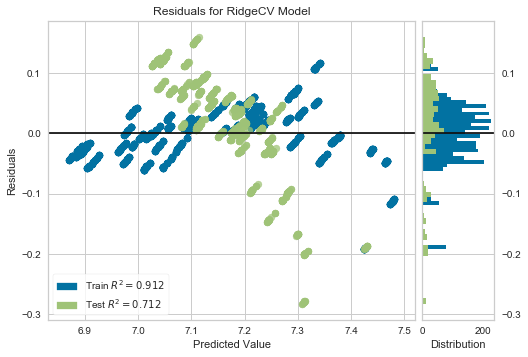

In [156]:
# Bartlett’s test
residuals = cv_ridge.predict(x_test) - y_test

split_array = np.split(residuals, 2)
sample1 = split_array[0]
sample2 = split_array[1]

import scipy.stats
bartlett = stats.bartlett(sample1, sample2)
print('The bartlett test´s statistics is {} and the p-value is {}'.format(bartlett[0], bartlett[1]))

# Plot residuals
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(cv_ridge)

# Fit the training data to the visualizer
visualizer.fit(x_train, y_train)  
# Evaluate the model on the test data
visualizer.score(x_test, y_test)  
# Finalize and render the figure
visualizer.show()                 

#### The plot allows us to check that there is not heteroskedasticity. In addition, the bartlett’s test p_value does not suffice to reject the null hypothesis (equal variances). Therefore, we can conclude that the homoskedasticity assumption holds. 




#### 2. Normality of the residuals assumption

#### In order to check normality a Q-Q plot is visualized below. Also, a battery of normality test are run: Jarque-Bera test, Shapiro-Wilk test, Anderson-Darling test and the Kolmogorov-Smirnov test.

Jarque_bera statistic is 243.47036549710634 and the p-value is 0.0
Shapiro-Wilk statistic is 0.902704119682312 and the p-value is 2.9005068110550487e-23
Anderson-Darling statistic is 28.208000713129195 and the p-values are [0.573 0.653 0.783 0.914 1.087]
Kolmogorov-Smirnov statistic is 0.4370858231244944 and the p-value is 3.59446198468957e-154


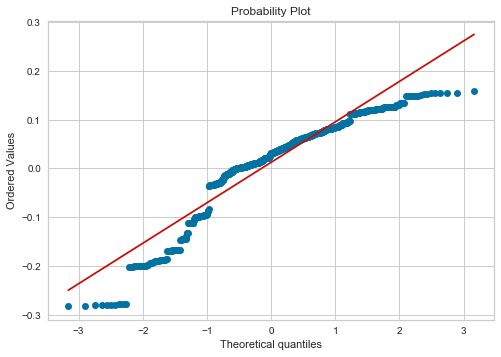

In [157]:
from scipy import stats
# Jarque_bera test
jb = stats.jarque_bera(residuals)
print('Jarque_bera statistic is {} and the p-value is {}'.format(jb[0], jb[1]))
# Shapiro-Wilk test
sw = stats.shapiro(residuals)
print('Shapiro-Wilk statistic is {} and the p-value is {}'.format(sw[0], sw[1]))
# Anderson-Darling test
ad = stats.anderson(residuals, dist = 'norm')
print('Anderson-Darling statistic is {} and the p-values are {}'.format(ad[0], ad[1]))
# Kolmogorov-Smirnov test
ks = stats.kstest(residuals, 'norm')
print('Kolmogorov-Smirnov statistic is {} and the p-value is {}'.format(ks[0], ks[1]))

# Plot Q-Q graph
stats.probplot(residuals, dist = "norm", plot = pylab)
pylab.show()

#### The plot shows that the residuals don´t follow an exact normal distribution. The battery of tests confirm this result. The fact that the normality assumptions does not hold should make us skeptical of the reliability of the model. Because of this reason, we will compare the predictions of the model against the y_test prices we are trying to predict. This allows an empirical comprobation. 


#### 3. Independence of the residuals assumption

#### Same as with the multiple linear regression model and the lasso model, a Durbin-Watson test is implemented to evaluate whether the residuals are indepentent.

In [158]:
db = durbin_watson(residuals, axis = 0)

print('The Durbin_Watson statistics is {}'.format(db))

The Durbin_Watson statistics is 1.9763134681138643


#### From the result above we can conclude that our residuals are independent. 

### 5.4 Generate and evaluate the prediction

#### Once we have our model, we predict prices for the houses in the testing dataset. This results in a vector that can be compared with the actual testing dataset (y_test). We test the accuracy of the predictions calculating the mean absolute error.

In [159]:
# Predict SalePrices with the model.
prediction = cv_ridge.predict(x_test)

# Check accuracy with MSE
print('The mean squared error (MSE) is {}'.format(mean_squared_error(y_test, prediction)))

# Check accuracy with RMSE
print('The root mean squared error (RMSE) is {}'.format(sqrt(mean_squared_error(y_test, prediction))))

# Check the accuracy of the model with MAE
print('The mean absolute error (MAE) is {}'.format(mean_absolute_error(y_test, prediction)))

The mean squared error (MSE) is 0.007738621106000911
The root mean squared error (RMSE) is 0.0879694327934477
The mean absolute error (MAE) is 0.06770894449522524


## 6. Gradient Boosting

#### In addition to the linear models implemented above, we also try non-linear, tree-based, models. There may be non-linear relationships in our data that our tree-models are able to capture, perhaps offering better performance that the linear models tried above. We will start by implement gradient boosting and then we will turn to random forest.

#### The steps to follow when implement gradient boosting are:
#### 1. Implement the gradient boosting model and check its R-squared for both the training and testing sets. 
#### 2. Tune the hyperparameters using cross-validation. This process allows to avoid overfitting that may have been suggested in the first step.
#### 3. Perform a prediction using our cross-validated model. Then, this predictions will be evaluated against our prices in the testing dataset (y_test).

### 6.1 Implement the gradient boosting model

In [160]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gbr = ensemble.GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Check score without cross-validation
print('The training R-squared is {}'.format(gbr.score(x_train, y_train)))
print('The testing R-squared is {}'.format(gbr.score(x_test, y_test)))

The training R-squared is 0.9978123681352978
The testing R-squared is 0.699380605837015


### 6.2 Tune hyperparameters using cross-validation 

#### The cross-validation shown below is the result of different trials adjusting the hyperparameters. Only the final option has been kept in order to save time when running the code.

In [161]:
# Fit cross-validated
grid_boosting = {'learning_rate':[0.4], 'n_estimators':range(50, 60, 3), 'max_depth': [12.5], 'criterion':['mae']}
cv_gbr = GridSearchCV(gbr, grid_boosting, cv = 3)
cv_gbr.fit(x_train, y_train)

# Selecting optimal parameters
print('The training R-squared is {}'.format((cv_gbr.score(x_train, y_train))))
print('The testing R-squared is {}'.format(cv_gbr.score(x_test, y_test)))
print('Chosen hyperparameters are: {}'.format(cv_gbr.best_params_))

The training R-squared is 0.9999999999994058
The testing R-squared is 0.6944697872922423
Chosen hyperparameters are: {'criterion': 'mae', 'learning_rate': 0.4, 'max_depth': 12.5, 'n_estimators': 50}


### 6.3 Generate and evaluate the prediction

#### Once we have our model, we predict prices for the houses in the testing dataset. This results in a vector that can be compared with the actual testing dataset (y_test). We test the accuracy of the predictions calculating the mean absolute error.

In [162]:
# Predict SalePrices with the model.
prediction = cv_gbr.predict(x_test)

# Check accuracy with MSE
print('The mean squared error (MSE) is {}'.format(mean_squared_error(y_test, prediction)))

# Check accuracy with RMSE
print('The root mean squared error (RMSE) is {}'.format(sqrt(mean_squared_error(y_test, prediction))))

# Check the accuracy of the model with MAE
print('The mean absolute error (MAE) is {}'.format(mean_absolute_error(y_test, prediction)))

The mean squared error (MSE) is 0.008195859465547349
The root mean squared error (RMSE) is 0.09053098621768874
The mean absolute error (MAE) is 0.0631829430382023


## 7. Random Forest

#### A random forest model is now implemented. The steps to follow are:
#### 1. Implement the random forest model and check its R-squared for both the training and testing sets. 
#### 2.Tune the hyperparameters using cross-validation. This process allows to avoid overfitting that may have been suggested in the first step.
#### 3. Perform a prediction using the cross-validated model. Then, this predictions will be evaluated against our prices in the testing set (y_test).

### 7.1 Implement the random forest model

In [163]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()
randomForest.fit(x_train, y_train)

# Check score without cross-validation
print('The training R-squared is {}'.format(randomForest.score(x_train, y_train)))
print('The testing R-squared is {}'.format(randomForest.score(x_test, y_test)))

The training R-squared is 1.0
The testing R-squared is 0.6597139593991694


### 7.2 Tune hyperparameters using cross-validation 

In [164]:
# Fit the cross-validated model
from sklearn.model_selection import GridSearchCV
grid_randomForest = {'n_estimators': range(230,235), 'max_depth': [15], 'criterion':['mae']} 
cv_randomForest = GridSearchCV(randomForest, grid_randomForest, cv = 3)
cv_randomForest.fit(x_train, y_train)

# Selecting optimal parameters
print('The training R-squared is {}'.format(cv_randomForest.score(x_train, y_train)))
print('The testing R-squared is {}'.format(cv_randomForest.score(x_test, y_test)))
print('Best parameters are {}'.format(cv_randomForest.best_params_))

The training R-squared is 0.9999876024456593
The testing R-squared is 0.7217184225944988
Best parameters are {'criterion': 'mae', 'max_depth': 15, 'n_estimators': 231}


#### Once we have our model, we predict prices for the houses in the testing dataset. This results in a vector that can be compared with the actual testing dataset (y_test). We test the accuracy of the predictions calculating the mean absolute error.

In [165]:
# Predict SalePrices with the model.
prediction = cv_randomForest.predict(x_test)

# Check accuracy with MSE
print('The mean squared error (MSE) is {}'.format(mean_squared_error(y_test, prediction)))

# Check accuracy with RMSE
print('The root mean squared error (RMSE) is {}'.format(sqrt(mean_squared_error(y_test, prediction))))

# Check the accuracy of the model with MAE
print('The mean absolute error (MAE) is {}'.format(mean_absolute_error(y_test, prediction)))

The mean squared error (MSE) is 0.007464913797078028
The root mean squared error (RMSE) is 0.08639973262156561
The mean absolute error (MAE) is 0.05991132667577169


## 8. Summary

#### We plot below the R-squared and the evaluation of the predictiosn from the implemented models to allow for an easier comparison.

In [166]:
print('============================================ LASSO ==============================================================')
print('Training set R-squared is {}'.format(cv_lasso.score(x_train, y_train)))
print('Testing set R-squared is {}'.format(cv_lasso.score(x_test, y_test)))
print('Amount of penalization is {}'.format(cv_lasso.alpha_))
print('------------------------------------------ Predictions --------------------------------------------------------')
# Predict SalePrices with the model.
prediction = cv_lasso.predict(x_test)
# Check accuracy with MSE
print('The mean squared error (MSE) is {}'.format(mean_squared_error(y_test, prediction)))

# Check accuracy with RMSE
print('The root mean squared error (RMSE) is {}'.format(sqrt(mean_squared_error(y_test, prediction))))

# Check the accuracy of the model with MAE
print('The mean absolute error (MAE) is {}'.format(mean_absolute_error(y_test, prediction)))

print('============================================ RIDGE ==============================================================')
print('Training set R-squared is {}'.format(cv_ridge.score(x_train, y_train)))
print('Testing set R-squared is {}'.format(cv_ridge.score(x_test, y_test)))
print('Amount of penalization is {}'.format(cv_ridge.alpha_))
print('------------------------------------------ Predictions --------------------------------------------------------')
# Predict SalePrices with the model.
prediction = cv_ridge.predict(x_test)
# Check accuracy with MSE
print('The mean squared error (MSE) is {}'.format(mean_squared_error(y_test, prediction)))

# Check accuracy with RMSE
print('The root mean squared error (RMSE) is {}'.format(sqrt(mean_squared_error(y_test, prediction))))

# Check the accuracy of the model with MAE
print('The mean absolute error (MAE) is {}'.format(mean_absolute_error(y_test, prediction)))

print('========================================== BOOSTING ============================================================')
print('Training set R-squared is {}'.format(gbr.score(x_train, y_train)))
print('Testing set R-squared is {}'.format(gbr.score(x_test, y_test)))
print('------------------------------------------ Predictions ---------------------------------------------------------')
# Predict SalePrices with the model.
prediction = gbr.predict(x_test)

# Check accuracy with MSE
print('The mean squared error (MSE) is {}'.format(mean_squared_error(y_test, prediction)))

# Check accuracy with RMSE
print('The root mean squared error (RMSE) is {}'.format(sqrt(mean_squared_error(y_test, prediction))))

# Check the accuracy of the model with MAE
print('The mean absolute error (MAE) is {}'.format(mean_absolute_error(y_test, prediction)))

print('========================================== RANDOM FOREST ========================================================')
print('The training R-squared is {}'.format(randomForest.score(x_train, y_train)))
print('The testing R-squared is {}'.format(randomForest.score(x_test, y_test)))
print('------------------------------------------ Predictions ---------------------------------------------------------')
# Predict SalePrices with the model.
prediction = randomForest.predict(x_test)

# Check accuracy with MSE
print('The mean squared error (MSE) is {}'.format(mean_squared_error(y_test, prediction)))

# Check accuracy with RMSE
print('The root mean squared error (RMSE) is {}'.format(sqrt(mean_squared_error(y_test, prediction))))

# Check the accuracy of the model with MAE
print('The mean absolute error (MAE) is {}'.format(mean_absolute_error(y_test, prediction)))

============================================ LASSO ==============================================================
Training set R-squared is 0.9116813172937848
Testing set R-squared is 0.7109560699180267
Amount of penalization is 0.0017481063261944845
------------------------------------------ Predictions --------------------------------------------------------
The mean squared error (MSE) is 0.007753614313054139
The root mean squared error (RMSE) is 0.08805460983420538
The mean absolute error (MAE) is 0.06778563290386308
============================================ RIDGE ==============================================================
Training set R-squared is 0.911688510052194
Testing set R-squared is 0.7115149957706968
Amount of penalization is 38.484848484848484
------------------------------------------ Predictions --------------------------------------------------------
The mean squared error (MSE) is 0.007738621106000911
The root mean squared error (RMSE) is 0.0879694327934477
The 